## Plot hexagon modulation align EC mean orientation across 4-8 folds

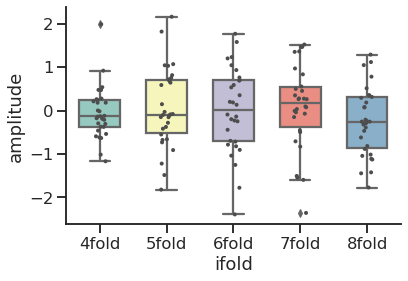

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("talk")

fig, ax = plt.subplots()

data = pd.read_csv(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexonM2Long/specificTo6/test_set/ec/'
r'subjects_ifold_EC_testPhi_adults.csv')

sns.boxplot(x='ifold', y="amplitude", data=data, width=.6,palette='Set3')
sns.stripplot(x='ifold', y="amplitude", data=data, size=4, color='.3', linewidth=0)
plt.show()

## Plot hexagon modulation align vmPFC mean orientation across 4-8 folds

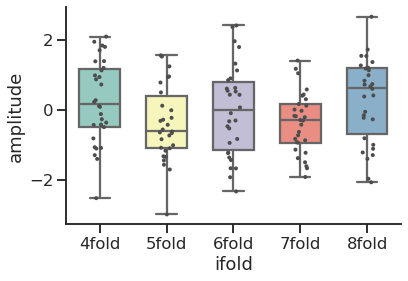

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("talk")

fig, ax = plt.subplots()

data = pd.read_csv(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexonM2Long/specificTo6/test_set/vmpfc/'
                   r'subjects_ifold_vmPFC_testPhi_adults.csv')

sns.boxplot(x='ifold', y="amplitude", data=data, width=.6,palette='Set3')
sns.stripplot(x='ifold', y="amplitude", data=data, size=4, color='.3', linewidth=0)
plt.show()

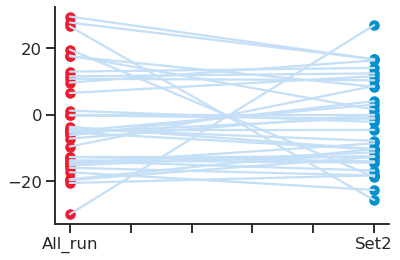

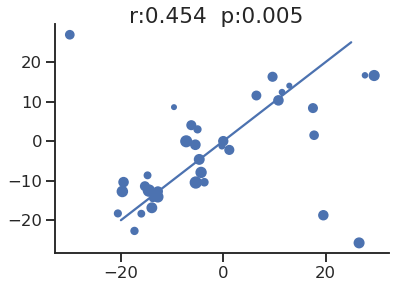

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

participants_tsv = r'/mnt/workdir/DCM/BIDS/participants.tsv'
participants_data = pd.read_csv(participants_tsv,sep='\t')
data = participants_data.query('usable==1')

set1_estPhi_data = pd.read_csv(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexonM2Long/specificTo6/Phi/backup/trainsetall_estPhi_mean.csv')
set2_estPhi_data = pd.read_csv(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexonM2Long/specificTo6/Phi/backup/trainset2_estPhi.csv')

set1_6fold_Phi = set1_estPhi_data.query("ifold=='6fold'")['vmpfc_phi'].to_list()
set2_6fold_Phi = set2_estPhi_data.query("ifold=='6fold'")['vmpfc_phi'].to_list()
sub_ids = set1_estPhi_data.query("ifold=='6fold'")['sub_id'].to_list()
size = []
for sub_id in sub_ids:
    sub_id = sub_id.replace('-','_')
    size.append(data.query('Participant_ID=="{}"'.format(sub_id))['game1_acc'].values[0])
size = np.array(size)
size = (size - size.min())/(size.max() - size.min()) * 100 + 20

fig, ax = plt.subplots()
for  phi1, phi2 in zip(set1_6fold_Phi, set2_6fold_Phi):
    ax.scatter(1,phi1,color='#ed1b2e')
    ax.scatter(2,phi2,color='#0091cd')
    ax.plot([1,2],[phi1,phi2],color='#c4dff6')
x_ticks = [1,1.2,1.4,1.6,1.8,2.0]
x_labels = ['All_run','','','','','Set2']
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.show()

res = spearmanr(set1_6fold_Phi,set2_6fold_Phi)
r = round(res[0],3)
p = round(res[1],3)

fig, ax = plt.subplots()
ax.scatter(set1_6fold_Phi,set2_6fold_Phi,s=size)
ax.plot([-20,25],(-20,25))
fig.subplots_adjust(top=0.92)
fig.suptitle('r:{}  p:{}'.format(r,p))
plt.show()

## Compare Over-fitted estimate Phis  of EC and vmPFC


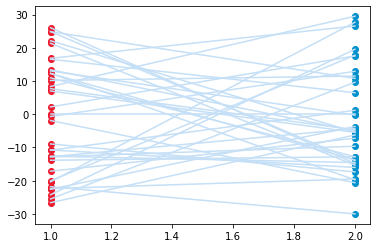

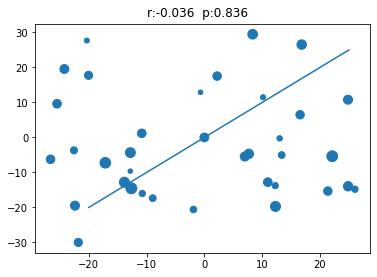

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

participants_tsv = r'/mnt/workdir/DCM/BIDS/participants.tsv'
participants_data = pd.read_csv(participants_tsv,sep='\t')
data = participants_data.query('usable==1')

set1_estPhi_data = pd.read_csv(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexonM2Long/specificTo6/Phi/backup/trainsetall_estPhi_mean.csv')
set2_estPhi_data = pd.read_csv(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexonM2Long/specificTo6/Phi/backup/trainsetall_estPhi_mean.csv')

set1_6fold_Phi = set1_estPhi_data.query("ifold=='6fold'")['ec_phi'].to_list()
set2_6fold_Phi = set2_estPhi_data.query("ifold=='6fold'")['vmpfc_phi'].to_list()
sub_ids = set1_estPhi_data.query("ifold=='6fold'")['sub_id'].to_list()
size = []
for sub_id in sub_ids:
    sub_id = sub_id.replace('-','_')
    size.append(data.query('Participant_ID=="{}"'.format(sub_id))['game1_acc'].values[0])
size = np.array(size)
size = (size - size.min())/(size.max() - size.min()) * 100 + 20

fig, ax = plt.subplots()
for  phi1, phi2 in zip(set1_6fold_Phi, set2_6fold_Phi):
    ax.scatter(1,phi1,color='#ed1b2e')
    ax.scatter(2,phi2,color='#0091cd')
    ax.plot([1,2],[phi1,phi2],color='#c4dff6')
plt.show()

res = spearmanr(set1_6fold_Phi,set2_6fold_Phi)
r = round(res[0],3)
p = round(res[1],3)

fig, ax = plt.subplots()
ax.scatter(set1_6fold_Phi,set2_6fold_Phi,s=size)
ax.plot([-20,25],(-20,25))
fig.subplots_adjust(top=0.92)
fig.suptitle('r:{}  p:{}'.format(r,p))
plt.show()

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

participants_tsv = r'/mnt/workdir/DCM/BIDS/participants.tsv'
participants_data = pd.read_csv(participants_tsv,sep='\t')
data = participants_data.query('usable==1').query('game1_acc>0.75')
sub_id = data['Participant_ID'].to_list()
sub_id = [s.replace("_",'-') for s in sub_id]

set1_estPhi_data = pd.read_csv(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexonM2Long/specificTo6/Phi/backup/trainset1_estPhi.csv')
set2_estPhi_data = pd.read_csv(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexonM2Long/specificTo6/Phi/backup/trainset2_estPhi.csv')

ec_6fold_Phi = set1_estPhi_data.query("sub_id in {}".format(sub_id)).query("ifold=='6fold'")['vmpfc_phi'].to_numpy()
vmpfc_6fold_Phi = set2_estPhi_data.query("sub_id in {}".format(sub_id)).query("ifold=='6fold'")['vmpfc_phi'].to_numpy()

In [28]:
diff = np.abs(ec_6fold_Phi - vmpfc_6fold_Phi)
diff = [60-d if d>30 else d for d in diff]
print(diff)
np.mean(diff)

[8.341262966394424, 7.359441757202148, 21.050735473632812, 26.948704719543457, 1.610180377960205, 11.798372268676756, 9.394077699631453, 20.621112823486328, 11.380400657653809, 12.81261944770813]


13.131690819188952